<a href="https://colab.research.google.com/github/paigejh13/practice1/blob/master/ENPH353_Lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import math

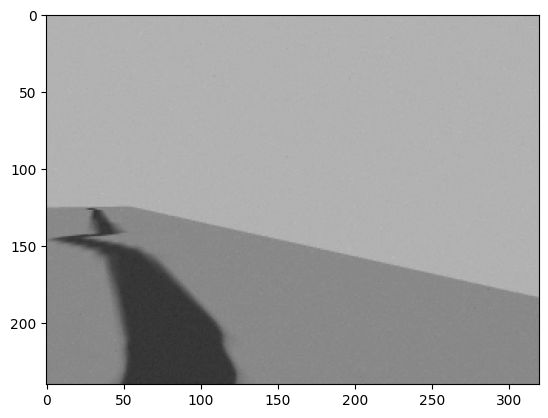

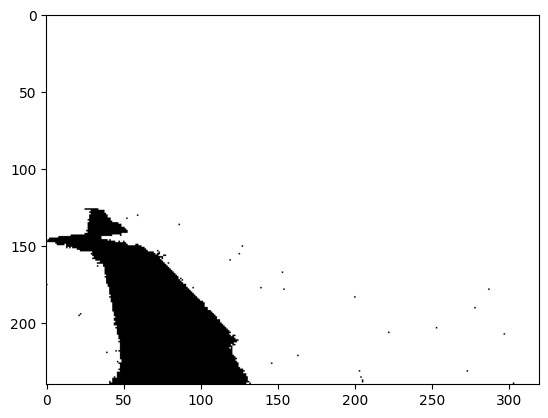

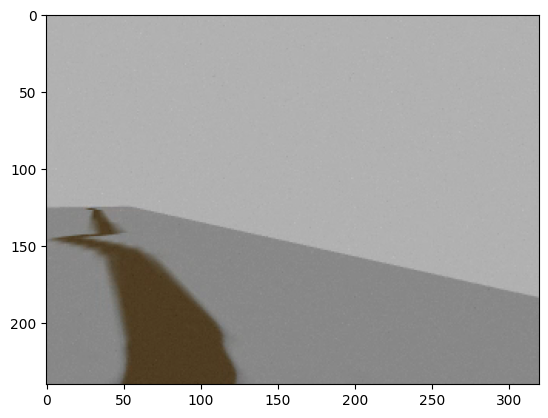

In [15]:
rawVid = cv2.VideoCapture('/content/raw_video_feed.mp4')


while rawVid.isOpened:
  val, frame = rawVid.read()

  img_gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
  plt.imshow(img_gray, cmap='gray', vmin=0, vmax=255)
  plt.show()

  threshold = 131 #@param {type: "slider", min: 0, max: 255}
  _, img_bin = cv2.threshold(img_gray, threshold, 255, cv2.THRESH_BINARY)
  plt.imshow(img_bin, cmap='gray', vmin=0, vmax=255)
  plt.show()

  plt.imshow(frame)
  plt.show()
  break

